## Notebook to preprocess the data
Contents:
- Normalization
- Skull stripping (later)

The preprocessing will most likely take a lot of time. A new dataset is made so the preprocessing only has to be done one single time.

In [77]:
# Imports
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import torch
from datahandling_utils import get_list_of_paths, createImageIndexCSV
import pydicom as pdc
import cv2 as cv
SEED = 41

In [78]:
# Load data
image_path = "D:/iCAT_IMAGES"
image_data = createImageIndexCSV(image_path)

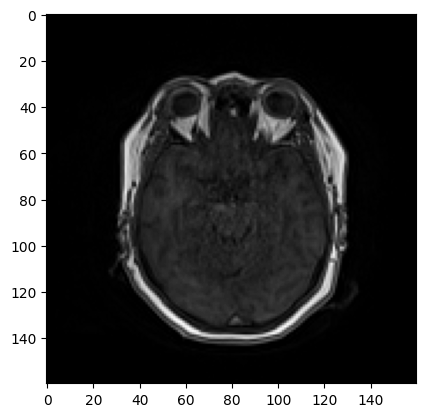

In [79]:
#Load and display example image
image_path = image_data[(image_data['Patient'] == 4) & (image_data['Volume'] == 2) & (image_data['Slice'] == 16)]['ImagePath'].item()
image = pdc.read_file(image_path).pixel_array
# image[image > 190] = 0
fig = plt.figure()
plt.imshow(image, cmap='gray')

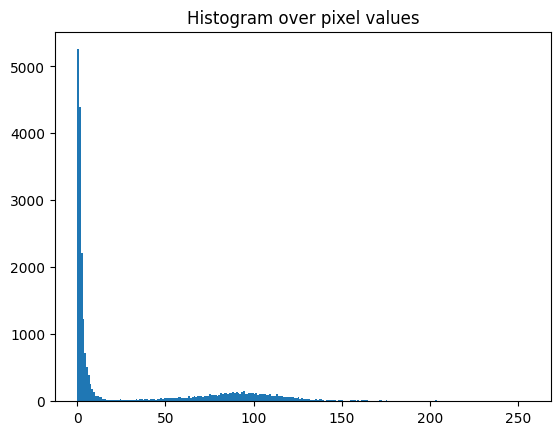

In [80]:
# Display histogram
fig = plt.figure()
plt.title('Histogram over pixel values')
plt.hist(image.ravel(), 256, [0, 256]); plt.show()


In [81]:
# Normalization
# MAX = 600
# image = image / MAX
# fig = plt.figure()
# plt.imshow(image, cmap = 'Greys')

In [82]:
# fig = plt.figure()
# plt.title('Histogram over pixel values')
# plt.hist(image.ravel(), 256, [0, np.max(image)]); plt.show()

In [83]:
# Otsu skull stripping
# image = cv.convertScaleAbs(image)
# ret, thresh = cv.threshold(image, 0, 255, cv.THRESH_BINARY)
# ret, markers = cv.connectedComponents(thresh)
# marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0]
# largest_component = np.argmax(marker_area) +1
# brain_mask = markers==largest_component
# brain_out = image.copy()
# brain_out[brain_mask==False] = 0
# fig = plt.figure()
# plt.imshow(brain_mask, cmap='gray')

In [84]:
from sklearn.cluster import KMeans
# pixel_vals = image.flatten()

# fig = plt.figure()
# plt.imshow(pixel_vals.reshape((image.shape)), cmap='gray')

In [85]:
def get_masks(model, pixels):
    clusters = model.predict(pixels)
    mask_representatives = model.cluster_centers_
    n_masks = len(mask_representatives)
    masks = [np.ones_like(pixels)*mask_representatives[i] for i in range(n_masks)]
    segmentation = np.zeros_like(pixels)
    for i in range(n_masks):
        masks[i][clusters != i] == 0
        segmentation += masks[i]
    return masks, segmentation

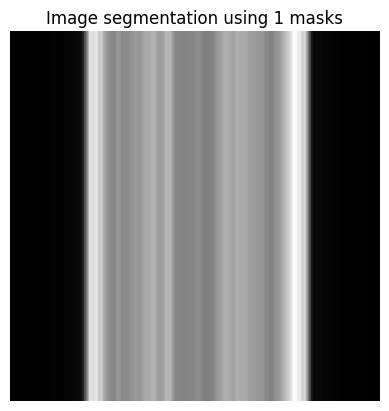

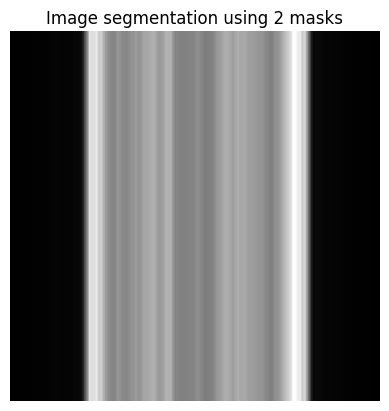

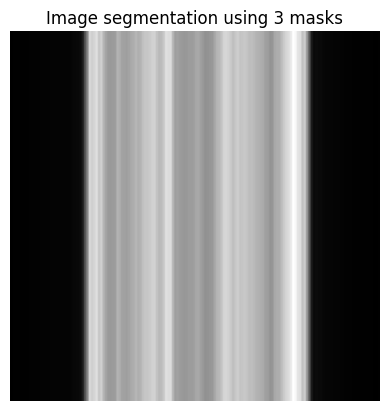

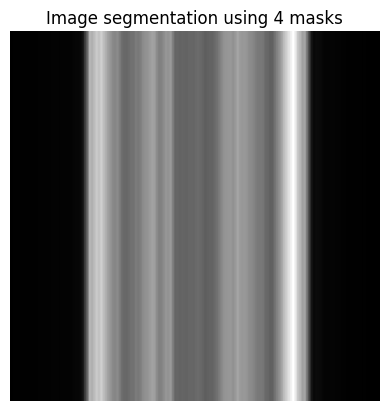

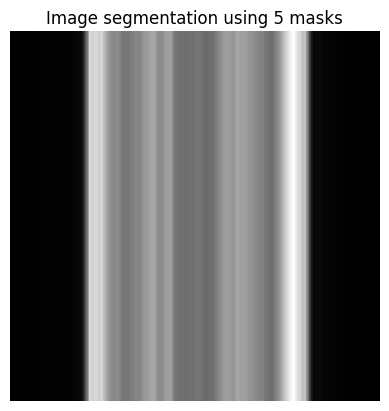

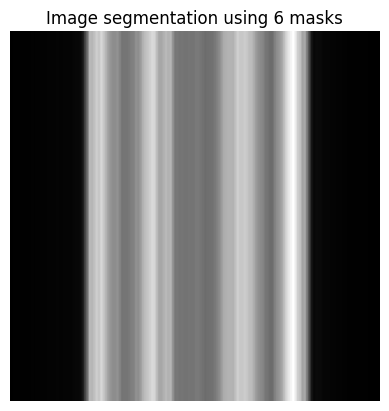

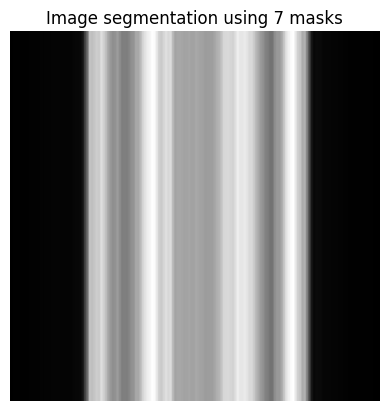

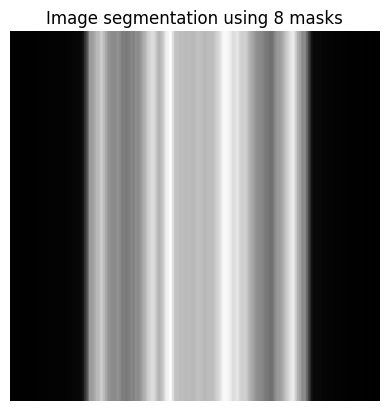

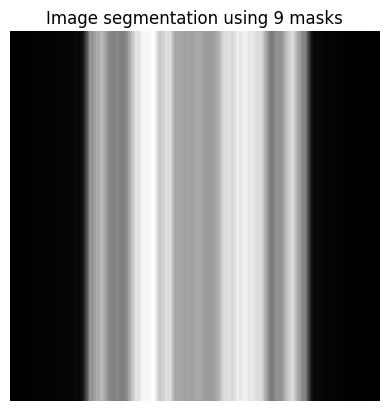

In [87]:
k_values = [i for i in range(1, 10)]
models = []
scores = []

for k in k_values:
    model = KMeans(k)
    model.fit(image.astype('float'))
    masks, segmentation = get_masks(model, image.astype('float'))

    fig, ax = plt.subplots()
    ax.axis('off')
    ax.imshow(segmentation, cmap='gray')
    ax.set_title(f'Image segmentation using {k} masks')